# Introducing Scikit-Learn

[Chapter](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Features matrix**

`X`: Assumed to be two dimensional: `[n_samples, n_features]`

**Target array**

`y`: aka *labels*, usually 1-D numpy array or pandas series

## Target array

`y`: aka *labels*, usually 1-D numpy array or pandas series

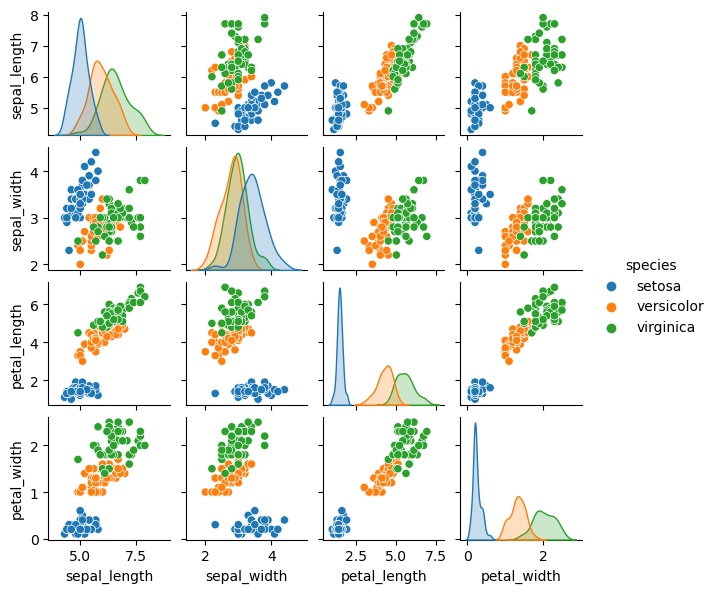

In [6]:
# sns.pairplot(iris, hue='species', size=1.5);
sns.pairplot(iris, hue='species', height=1.5);

In [7]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)


1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the `predict()` method.
    - For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.


## Supervised learning example: Simple linear regression

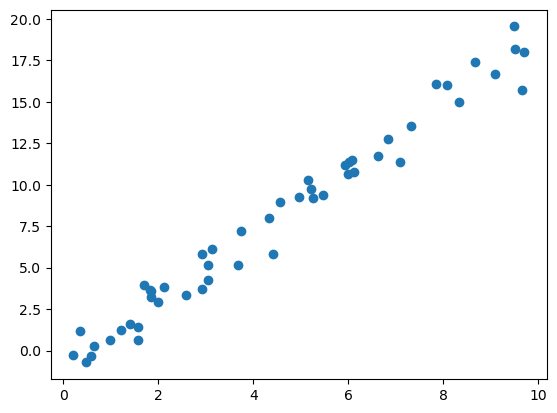

In [9]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True, n_jobs=1)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [13]:
x.shape

(50,)

In [15]:
x[0:5]

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ])

Transform `x` into the size [n_samples, n_features]

In [16]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [17]:
X[0:5]

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ]])

In [18]:
model.fit(X, y)

LinearRegression(n_jobs=1)

In [19]:
print(f'{model.coef_=}\n{model.intercept_=}')

model.coef_=array([1.9776566])
model.intercept_=-0.9033107255311146


In [20]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

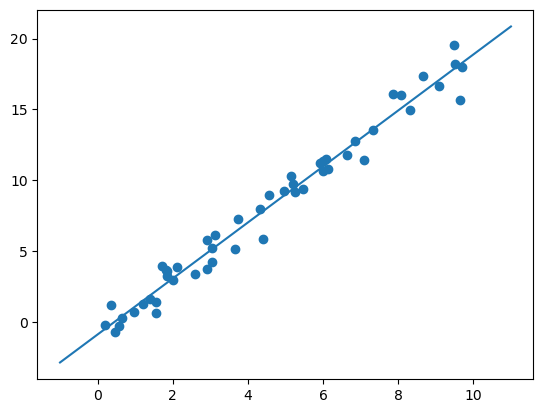

In [22]:
plt.scatter(x,y)
plt.plot(xfit, yfit);

In [23]:
z = model.coef_ * xfit + model.intercept_

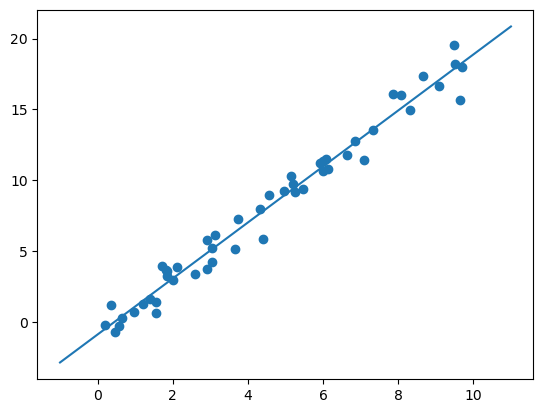

In [26]:
plt.scatter(x,y)
# plt.plot(xfit, yfit)
plt.plot(xfit, z);

## Supervised learning: Iris classification

Using Gaussian naive Bayes

In [27]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised learning: Iris dimensionalilty

Here we will use principal component analysis (PCA; see In Depth: Principal Component Analysis), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

In [40]:
from sklearn.decomposition import PCA 
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

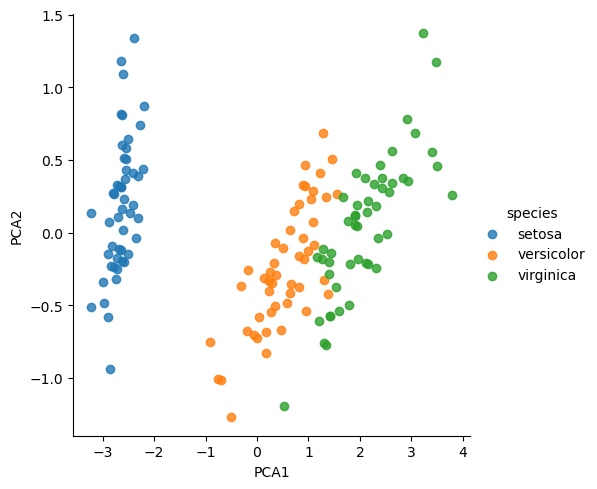

In [41]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
# sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);
sns.lmplot(data=iris, x="PCA1", y="PCA2", hue='species', fit_reg=False);

## Unsupervised learning: Iris clustering

In [42]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gnm = model.predict(X_iris)

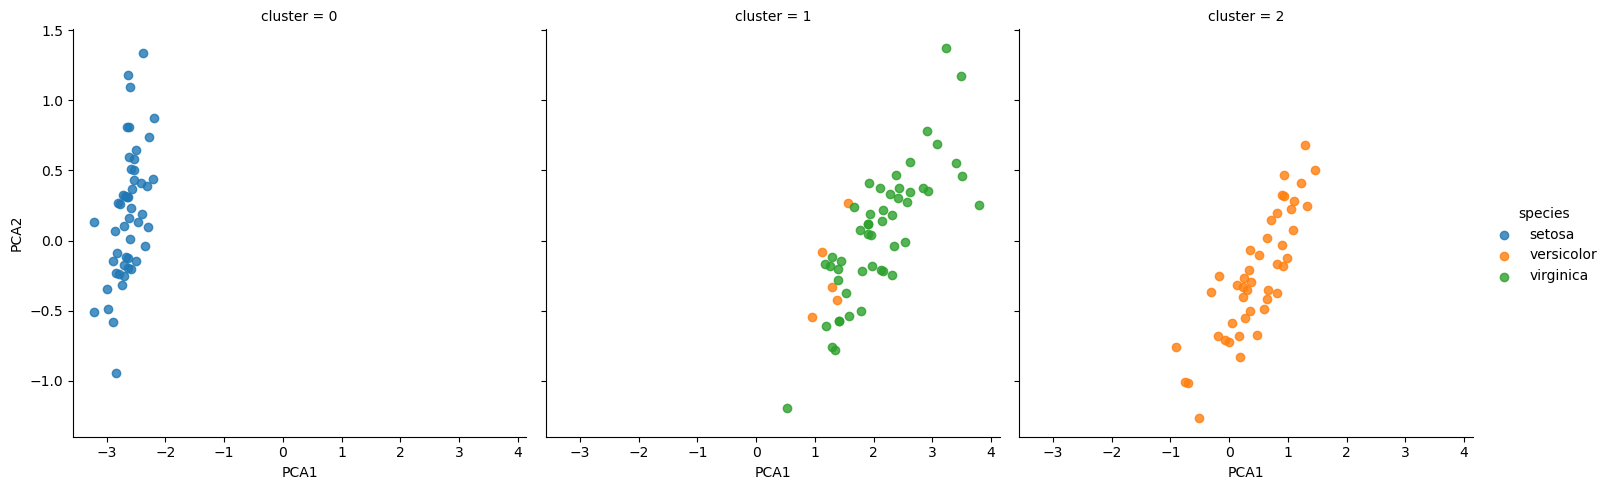

In [43]:
iris['cluster'] = y_gnm
sns.lmplot(data=iris, x="PCA1", y="PCA2", hue='species',
           col='cluster', fit_reg=False);

## Exploring hand-written data

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

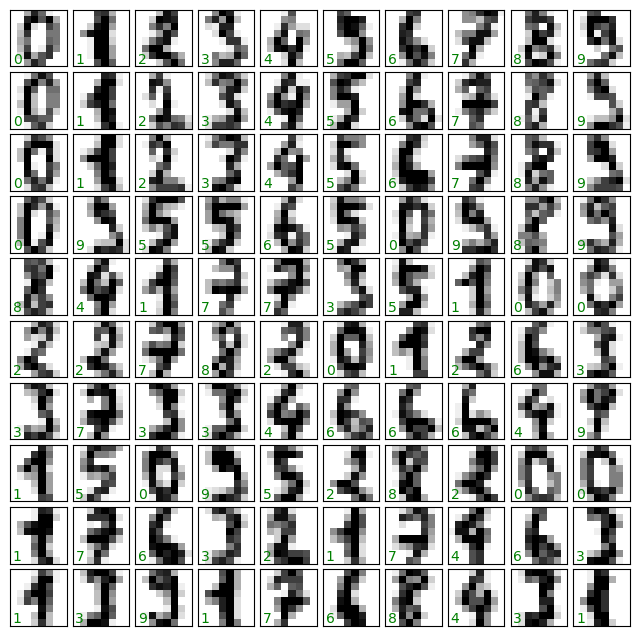

In [45]:
# The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.

fig, axes = plt.subplots(10, 10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [48]:
X = digits.data
X.shape

(1797, 64)

In [49]:
y = digits.target
y.shape

(1797,)

### Dimensionality reduction

In [50]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

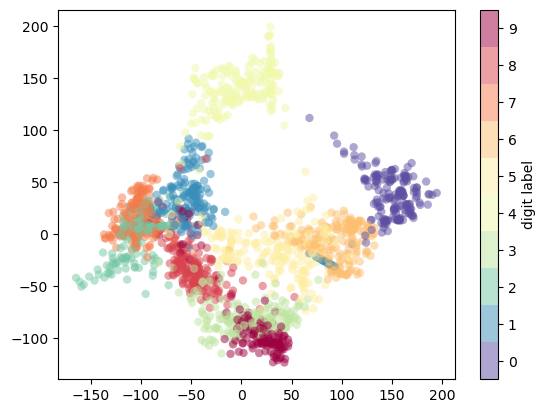

In [54]:
plt.scatter(data_projected[:, 0], data_projected[:,1],
            c=digits.target, edgecolors='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

## Classification on digits

In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [57]:
accuracy_score(ytest, y_model)

0.8333333333333334

Text(113.9222222222222, 0.5, 'true value')

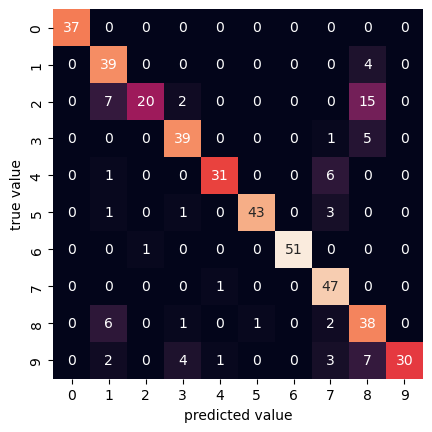

In [58]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

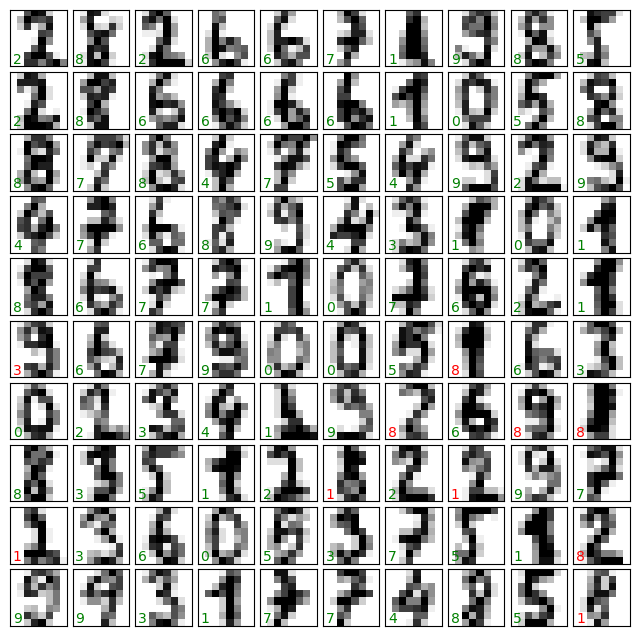

In [59]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')